In [303]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Функции инициализации центроидов

In [304]:
def rand_u_init(data, k):
    # just random initialization
    # suppose data - np.array
    return np.random.rand(k, data.shape[1]) * np.amax(data);

In [305]:
def distinct_points_init(data, k):
    # a <= x <= b 
    # c <= y <= d
    a, b = np.min(data[:, 0]), np.max(data[:, 0])
    c, d = np.min(data[:, 1]), np.max(data[:, 1])
    w = int(np.ceil(np.sqrt(k)))
    h = int(np.ceil(k / w))
    margin_x = (b - a)/(w + 1)
    margin_y = (d - c)/(h + 1)
    x = np.tile(np.linspace(a + margin_x, b - margin_x, w), h)[:, np.newaxis]
    y = np.repeat(np.linspace(c + margin_y, d - margin_y, h), w)[:, np.newaxis]
    res = np.concatenate((x, y), axis=1)
    return res[:k]

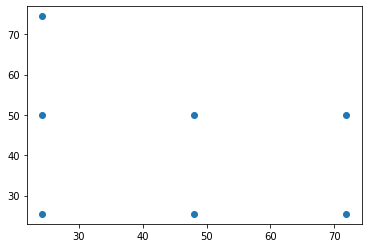

In [306]:
# пример иницализации
data = np.random.random(size=(100, 2)) * 100
x = distinct_points_init(data, 7)
plt.scatter(x[:, 0],x[:, 1])

# K-means model

In [307]:
hist = []
class KMeans:
    '''
    K-means divide points onto k clasters,
    where interclaster distance is minimized
    
    init:
    k - number of clasters
    u_init(data, k) - function, that initialize centroids
                      rand_u_init by default
                      
    fit:
    data - 2d array, points to clasterize
    t - number of iterations
    '''
    def __init__(self, k, u_init=rand_u_init):
        self.k = k # number of clasters
        self.u_init = u_init
        
    def fit(self, data, delta=0.01, t=100):
        # suppose data is np.array
        # length - number of points
        # n - number of dimensions
        length, n = data.shape
        u = self.u_init(data, self.k)
        for i in range(t):
            # calculate distinct matrix
            # dist_matrix[i, j] - distance between i centroid and j point
            dist_matrix = np.sum(np.square(x - u[:, np.newaxis]), axis=-1)
            # number of claster for each point
            c = np.argmin(dist_matrix, axis=0)
            u_new = np.zeros((self.k, 2))
            # recalculate centroids
            for i in range(self.k):
                p = data[c == i]
                l = p.shape[0]
                if l == 0:
                    continue
                u_new[i] = np.sum(p, axis=0) / l
            # early stop criteria
            if np.max(np.sum(np.square(u_new - u), axis = -1)) <= np.square(delta):
                return (u_new, c)
            u = u_new
        # return centroids and clasters
        return (u, c)

# Testing

In [308]:
def draw_clasters(data, u, c, k):
    for i in range(k):
        claster = c == i
        plt.scatter(data[claster, 0],data[claster, 1])
    for i in range(k):
        plt.scatter(u[i, 0], u[i, 1], marker='x', color='red')

## Стресс тест

In [309]:
x = np.random.random(size=(100000, 2))*1000000

In [310]:
%%time
model = KMeans(10, distinct_points_init)
u, c = model.fit(x)

Wall time: 2.3 s


## 3 кучи с нормальным распределением, небольшой дисбаланс

In [311]:
x1 = np.random.normal(size=(50, 2))*3
x2 = np.random.normal(size=(100, 2))*2 + 10
x3 = np.random.normal(size=(200, 2)) + 20
x = np.concatenate((x1, x2, x3))

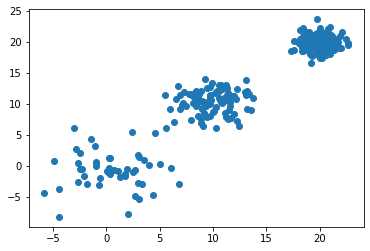

In [312]:
plt.scatter(x[:, 0],x[:, 1])

случайный инициализатор

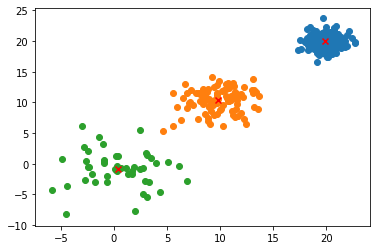

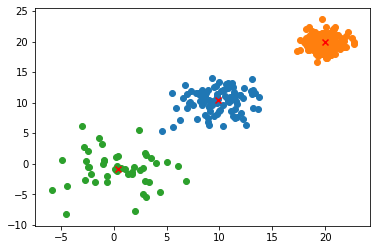

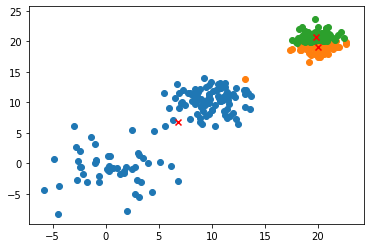

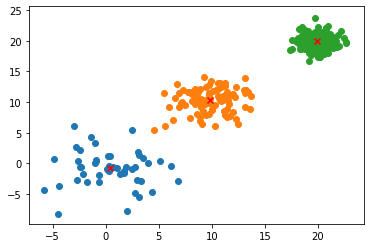

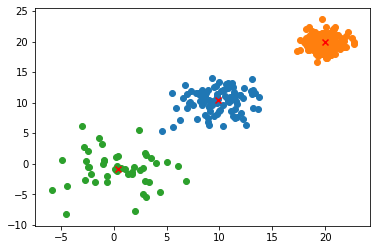

In [313]:
k = 3
for i in range(5):
    model = KMeans(k)
    u, c = model.fit(x)
    draw_clasters(x, u, c, k)
    plt.show()

инициализация k достаточно удалённых точек

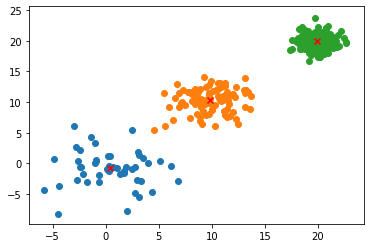

In [314]:
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

## Сильный дисбаланс классов с непропорциональным межкластерным расстоянием

In [315]:
x1 = np.random.normal(size=(5000, 2))*3
x2 = np.random.normal(size=(10000, 2))*2 + 30
x3 = np.random.normal(size=(20000, 2)) + 40
x = np.concatenate((x1, x2, x3))

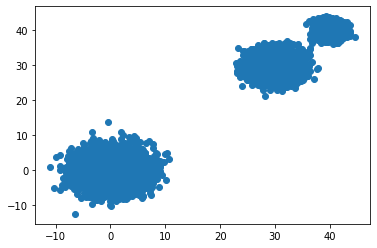

In [316]:
plt.scatter(x[:, 0],x[:, 1])

случайный инициализатор

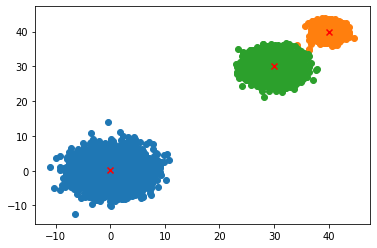

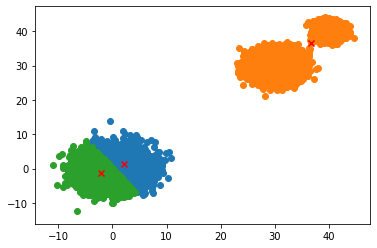

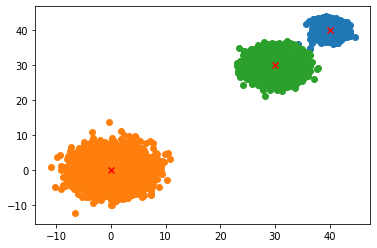

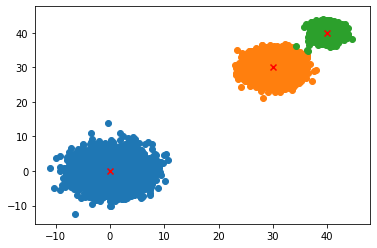

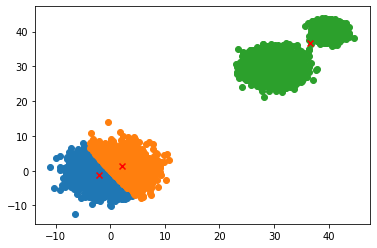

In [317]:
k = 3
for i in range(5):
    model = KMeans(k)
    u, c = model.fit(x)
    draw_clasters(x, u, c, k)
    plt.show()

инициализация k достаточно удалённых точек

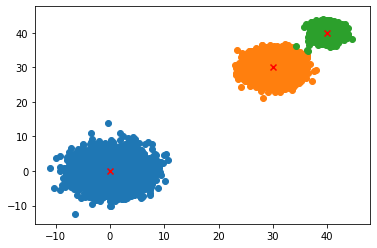

In [318]:
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

## Много малых классов

In [319]:
x1 = np.random.normal(size=(15, 2))*0.5
x2 = np.random.normal(size=(15, 2))*0.5 + 5
x3 = np.random.normal(size=(15, 2))*0.5 + 10
x4 = np.random.normal(size=(15, 2))*0.5 + 20
x5 = np.random.normal(size=(15, 2))*0.5 + 25
x6 = np.random.normal(size=(15, 2))*0.5 + 30
x7 = np.random.normal(size=(15, 2))*0.5 + 35
x8 = np.random.normal(size=(15, 2))*0.5 + 40
x9 = np.random.normal(size=(15, 2))*0.5 + 45
x = np.concatenate((x1, x2, x3, x4, x5, x6, x7, x8, x9))

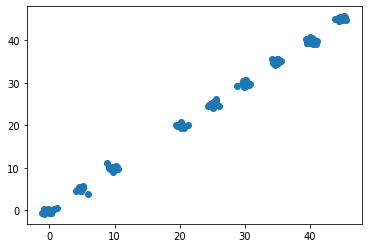

In [320]:
plt.scatter(x[:, 0],x[:, 1])

случайный инициализатор (5 инициализаций)

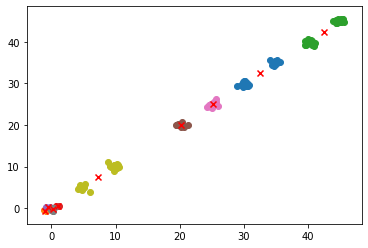

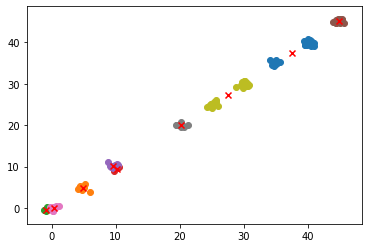

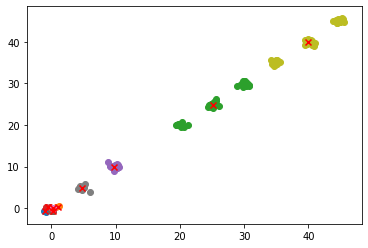

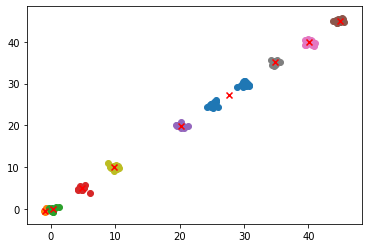

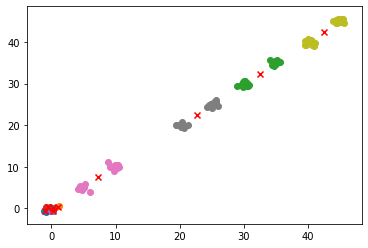

In [322]:
k = 9
for i in range(5):
    model = KMeans(k)
    u, c = model.fit(x)
    draw_clasters(x, u, c, k)
    plt.show()

инициализация k достаточно удалённых точек

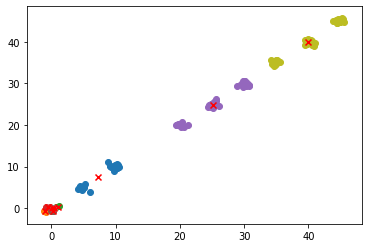

In [323]:
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

## Случайные данные

In [324]:
x = np.random.random(size=(1000, 2))*100

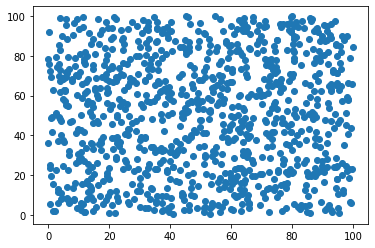

In [325]:
plt.scatter(x[:, 0],x[:, 1])

случайный инициализатор

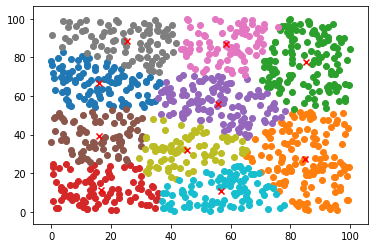

In [329]:
k  = 10
model = KMeans(k)
u, c = model.fit(x)
draw_clasters(x, u, c, k)
plt.show()

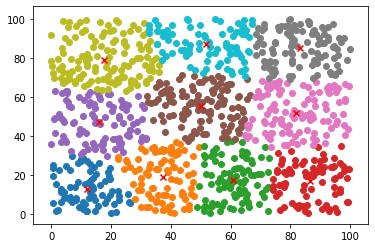

In [330]:
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

# Как выбрать К?

# Матрица попарных расстояний

Рассмотрим пример

In [471]:
x1 = np.random.normal(size=(50, 2))*2
x2 = np.random.normal(size=(100, 2))*2 + 10
x2[:, 1] -= 5
x3 = np.random.normal(size=(200, 2)) + 20
x3[:, 0] -= 15
x4 = np.random.normal(size=(70, 2))
x4[:, 1] += 10
x = np.concatenate((x1, x2, x3, x4))
np.random.shuffle(x)

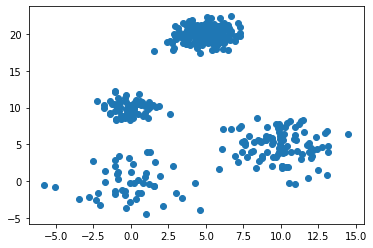

In [472]:
plt.scatter(x[:, 0],x[:, 1])

In [473]:
dist_matrix = np.sqrt(np.sum(np.square(x - x[:, np.newaxis]), axis=-1))

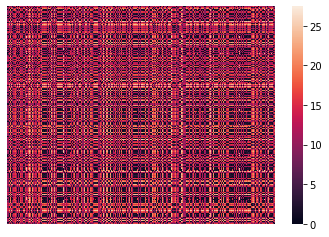

In [474]:
import seaborn as sns
sns.heatmap(dist_matrix, xticklabels=False, yticklabels=False)

найдём кластеры

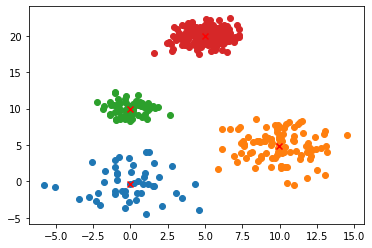

In [475]:
k = 4
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

Вот они сверху вниз:

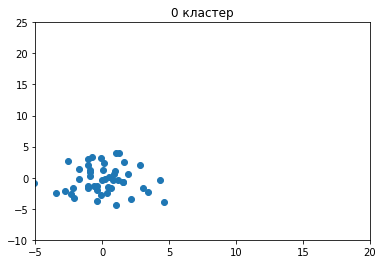

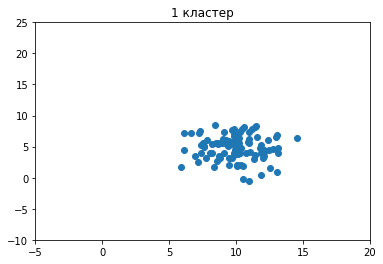

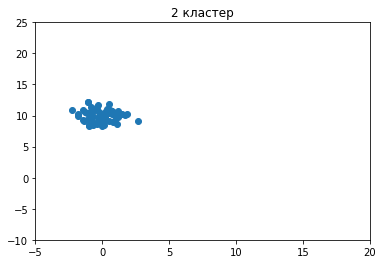

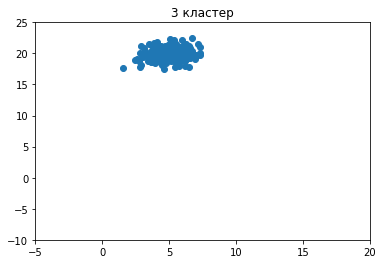

In [476]:
for i in range(k):
    plt.title(f"{i} кластер")
    plt.xlim(-5, 20)
    plt.ylim(-10, 25)
    plt.scatter(x[c==i, 0],x[c==i, 1], )
    plt.show()

Упорядочим кластеры (произвольно)

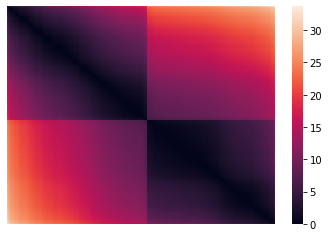

In [477]:
data = np.concatenate((c[:, np.newaxis], x), axis=-1)
data = np.sort(data, axis=0)[:, 1:]
dist_matrix = np.sqrt(np.sum(np.square(data - data[:, np.newaxis]), axis=-1))
sns.heatmap(dist_matrix, xticklabels=False, yticklabels=False)

Пусть площадь кластера i: s_i = ср квадратичное(dist_matrix(claster i)) ^2 \
Назовём плотность кластера c_i: p_i = c_i / s_i \
Чтобы упорядочить кластеры можно учитывать плотность \
Так же желательно учитывать расстояние до ближайших кластеров (высчитывается по магической формуле)

In [498]:
p = np.zeros((k))
min_interclaster_dist = np.zeros((k))
for i in range(k):
    claster_i = c==i
    # np do  <dist_matrix[claster_i, claster_i]>  wrong!
    dist_i = dist_matrix[claster_i, :][:, claster_i]
    length = dist_i.shape[0]
    s = np.max(dist_i * dist_i)
    p[i] =  length / s
    # interclaster distance
    claster_j = c!=i
    dist_ij = np.sort(dist_matrix[claster_i, :][:, claster_j].flatten())
    n = dist_ij.shape[0]
    # magic formula       
    min_interclaster_dist[i] = np.mean(dist_ij[:int(np.sqrt(n)) + 1])
p, min_interclaster_dist

(array([0.05318061, 0.12170785, 0.06866619, 0.18824957]),
 array([0.05372704, 0.04289425, 0.04191973, 0.03488809]))

Будем упорядочивать по значению: <плотность> * <межкластерное расстояние>^2

In [499]:
criteria = p * np.square(min_interclaster_dist)
criteria

array([0.00015351, 0.00022393, 0.00012066, 0.00022913])

Кластеры с большим значением этого критерия более отделены от остальных (будем на это надеятся)

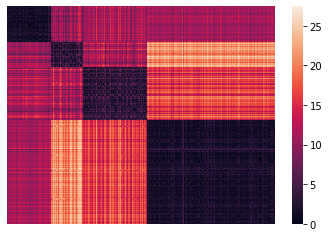

In [501]:
result = np.concatenate(tuple(x[c==i] for i in np.argsort(criteria)), axis=0)
dist_matrix = np.sqrt(np.sum(np.square(result - result[:, np.newaxis]), axis=-1))
sns.heatmap(dist_matrix, xticklabels=False, yticklabels=False)